In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
import re

In [2]:
output = load('hists_ttcom_dummy_sample.coffea')

btagCMVA btagCSVV2


/afs/cern.ch/user/f/fsimpson/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


btagDeepB btagDeepC


/afs/cern.ch/user/f/fsimpson/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


btagDeepFlavB btagDeepFlavC


/afs/cern.ch/user/f/fsimpson/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_0 DeepCSV_trackDecayLenVal_1


/afs/cern.ch/user/f/fsimpson/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_2 DeepCSV_trackDecayLenVal_3


/afs/cern.ch/user/f/fsimpson/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_4 DeepCSV_trackDecayLenVal_5


/afs/cern.ch/user/f/fsimpson/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDeltaR_0 DeepCSV_trackDeltaR_1
DeepCSV_trackDeltaR_2 DeepCSV_trackDeltaR_3
DeepCSV_trackDeltaR_4 DeepCSV_trackDeltaR_5
njet nbjet_t
nbjet_m nbjet_l
nel nmu
lelpt lmupt
ljpt sljpt


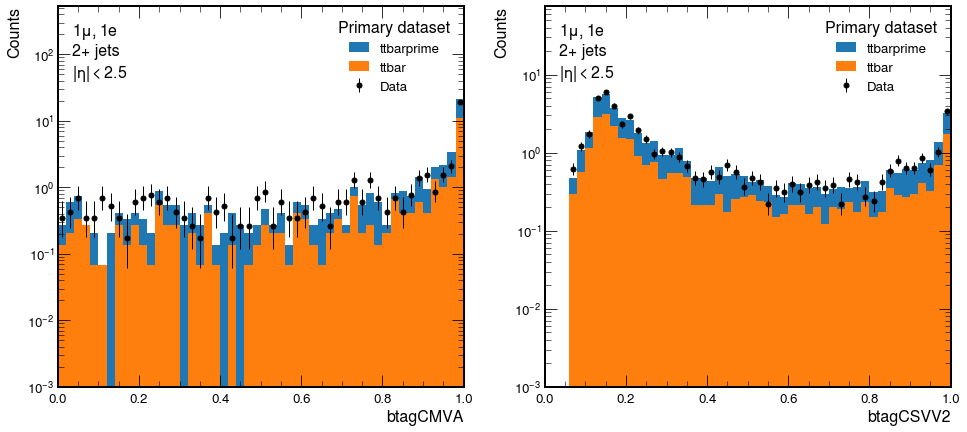

In [ ]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharex=True)
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    print(h1name, h2name)
    h1 = output[h1name]
    h2 = output[h2name]
    # if True: normalize histo to 1
    dense = True
    
    for ax, h in zip([ax1, ax2], [h1, h2]):
        # scale MC samples according to lumi (for now, dummy scale)
        scales = {
            'ttbar': 0.1,
            'ttbarprime':0.1,
        }
        h.scale(scales,axis='dataset')
        notdata = re.compile('(?!Data)')
        if hasattr(h, 'dim'):
            plot.plot1d(h[notdata], ax=ax, legend_opts={'loc':1}, density=dense, stack=True, clear=False);
            plot.plot1d(h["Data"], ax=ax, legend_opts={'loc':1}, density=dense, error_opts=data_err_opts, clear=False);
        else:
            continue    
        #break
    for ax, hname in zip([ax1, ax2], [h1name, h2name]):
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
        if hname.startswith("btag") or hname.startswith("DeepCSV_trackDecayLenVal"):
            ax.semilogy()
        ax.set_ylim(0.001, None)
    hep.mpl_magic(ax1)
    hep.mpl_magic(ax2)